An *Andrews plot* or *Andrews curve* is a methods for visualising high-dimensional data. A sample with multiple features gets projected to a 2-dimensional curve in the hope that one can see some structure there or even make out different classes.

References:
1. https://en.wikipedia.org/wiki/Andrews_plot
2. http://www.jucs.org/jucs_11_11/visualization_of_high_dimensional/jucs_11_11_1806_1819_garc_a_osorio.pdf

In [1]:
from sklearn.datasets import load_wine
import numpy as np
import math
import matplotlib.pyplot as plt

Here we load the wine dataset, where 13 measurments were made on 178 wine samples. Each sample belong to one of three different types of wines. As the the dataset is ordered by the type of wine, we randomily permutate the samples. As a result, when we later plot the different types with different colors, no color will completely overlapp any other color.

In [2]:
data = load_wine()
labels = data.target
samples = data.data
n_samples, n_features =  samples.shape

perm = np.random.permutation(n_samples)
labels = labels[perm]
samples = samples[perm, :]

The features use different dimensions, so we normalize the samples. In this case, this actually turns out to be a bad choice, as the features with large varities seem to be the best for distinguishing the different classes.

In [3]:
samples -= np.mean(samples, axis=0)
samples /= np.std(samples, axis=0)

In an Andrews plot the order of the features is important because the features that get mapped to lower frequncies have better visibility. Because we lack a better measure, we take for each feature the difference between the maximum and minimum over all samples and sort the features in decreasing order.

In [4]:
sorted_indices = np.argsort(samples.min(axis=0) - samples.max(axis=0))
samples = samples[:, sorted_indices]

This function maps each sample to a function `y(t)`. As this is basically a dot product, this could be done more efficiently with numpy but for our case it is fast enough.

In [5]:
def sample2func(sample, t):
    n_features = len(sample)
    result = sample[0] / math.sqrt(2)
    for i in range(1, n_features):
        if i % 2 == 1:
            result += sample[i] * math.sin((i + 1) / 2 * t)
        else:
            result += sample[i] * math.cos(i / 2 * t)
    return result

We now draw the Andrews plot. Each sample corresponds to a line in the plot and we color the lines by the wine class the sample belongs to.

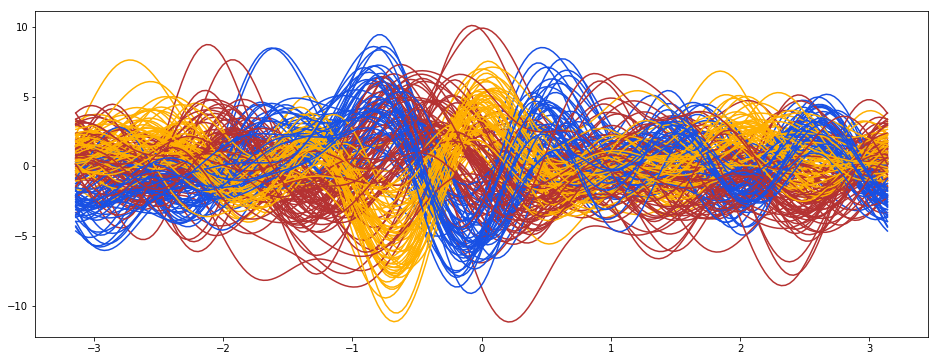

In [6]:
x = np.linspace(-np.pi, np.pi, 200)

ys = np.zeros((len(x), n_samples))
for i in range(n_samples):
    ys[:,i] = list(map(lambda t: sample2func(samples[i,:], t), x))

plt.rcParams["figure.figsize"] =(16,6) # set the plot size for Jupyter
    
fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)
colors =["#FFB000", "#B53232", "#1850E4"] # colors that should be easy to distinguish by colorblind people
for i in range(n_samples):
    ax.plot(x, ys[:,i], colors[labels[i]])

As we can see, there is clearly some difference in the features for each type. On the other hand, it would be impossible to distinguish the types, if we hadn't known them in beforehand.

To see, that the oucome is indeed different from random noise, we draw an Andrews plot with the labels randomly permutated.

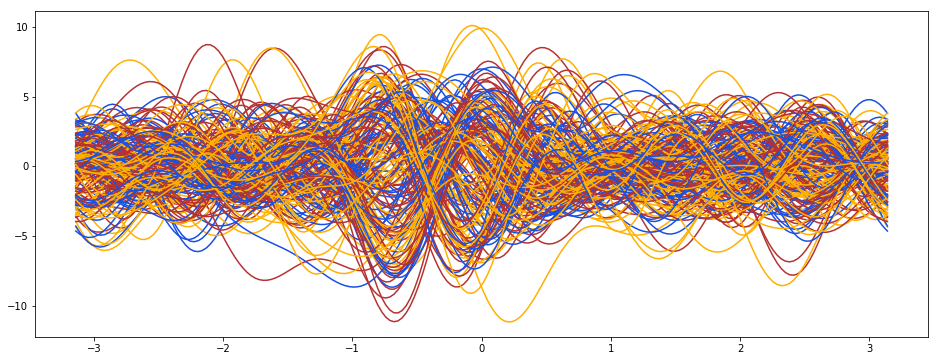

In [7]:
fig2 = plt.figure()
ax = fig2.add_subplot(1, 1, 1)
labels_random = np.random.permutation(labels)
for i in range(n_samples):
    ax.plot(x, ys[:,i], colors[labels_random[i]])